# Feature Engineering with SHAP values Experiment 1

SHAP Images of server with different number of poisoned clients
* number of malicious clients [0,1,2,3,4,5]

SHAP Images right after poisoning attack
* rounds [1,2,10,75,200]

Summation of Differences SHAP Images right after poisoning attack
* rounds [1,2,10,75,200]
* 5 times

## Google Colab

In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')
sys.path.append('/content/drive/My Drive/Colab Notebooks/federated_learning')

!pip install shap==0.40.0

## Experiments

In [8]:
from federated_learning.utils import SHAPUtil, experiment_util, Visualizer
from federated_learning import ClientPlane, Configuration, ObserverConfiguration
from federated_learning.server import Server
from datetime import datetime

## MNIST
(1) 5 → 4,
(2) 1 → 7,
(3) 3 → 8,

In [9]:
from federated_learning.nets import MNISTCNN
from federated_learning.dataset import MNISTDataset
import os
config = Configuration()
config.POISONED_CLIENTS = 0
config.DATA_POISONING_PERCENTAGE = 1
config.DATASET = MNISTDataset
config.MODELNAME = config.MNIST_NAME
config.NETWORK = MNISTCNN
observer_config = ObserverConfiguration()
observer_config.experiment_type = "shap_fl_poisoned"
observer_config.experiment_id = 1
observer_config.test = False
observer_config.datasetObserverConfiguration = "MNIST"
neutral_label = 2

In [6]:
# Google Colab Settigns
config.TEMP = os.path.join('/content/drive/My Drive/Colab Notebooks/temp')
config.FMNIST_DATASET_PATH = os.path.join('/content/data/fmnist')
config.MNIST_DATASET_PATH = os.path.join('/content/data/mnist')
config.CIFAR10_DATASET_PATH = os.path.join('/content/data/cifar10')
config.VM_URL = "none"

In [10]:
data = config.DATASET(config)
shap_util = SHAPUtil(data.test_dataloader) 
server = Server(config, observer_config,data.train_dataloader, data.test_dataloader, shap_util)
client_plane = ClientPlane(config, observer_config, data, shap_util)
visualizer = Visualizer(shap_util)

MNIST training data loaded.
MNIST test data loaded.
Create 200 clients with dataset of size 300


In [ ]:
import numpy as np
import copy
for i in range(199):
    experiment_util.set_rounds(client_plane, server, i+1)
    experiment_util.run_round(client_plane, server, i+1)
print("Run 199 finished")
old_params = copy.deepcopy(server.get_nn_parameters())

In [ ]:

#import torch
#torch.save(server.net.state_dict(), "/content/drive/My Drive/Colab Notebooks/temp/models/MNISTtrained2.model")

### alpha (5,4)

In [ ]:
config.FROM_LABEL = 5
config.TO_LABEL = 4

accuracies = []
recalls = []

server.net =  MNISTCNN()
server.net.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/temp/models/MNISTtrained2.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = './results/ex3/MNIST/5_4/_run_shap_values_{}_poisoned_clients_alpha_5_4.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [ ]:
# Run 0
print(accuracies)
print(recalls)

### alpha (1,7)

In [ ]:
import copy
import torch
from federated_learning.nets import MNISTCNN
config.FROM_LABEL = 1
config.TO_LABEL = 7

server.net =  MNISTCNN()
server.net.load_state_dict(torch.load('temp/models/MNISTtrained2.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [ ]:
accuracies = []
recalls = []

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = './results/ex3/MNIST/1_7/4_run_shap_values_{}_poisoned_clients_alpha_1_7.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [ ]:
# Run 0
print(accuracies)
print(recalls)

### alpha (3,8)

In [11]:
import copy
import torch
from federated_learning.nets import MNISTCNN
config.FROM_LABEL = 3
config.TO_LABEL = 8

server.net =  MNISTCNN()
server.net.load_state_dict(torch.load('temp/models/MNISTtrained2.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [12]:
accuracies = []
recalls = []

Load default model successfully

Test set: Average loss: 0.0001, Accuracy: 9749/10000 (97%)

Original tensor([0.9929, 0.9921, 0.9787, 0.9832, 0.9745, 0.9709, 0.9823, 0.9582, 0.9548,
        0.9594]) tensor([0.9653, 0.9869, 0.9555, 0.9585, 0.9846, 0.9807, 0.9864, 0.9733, 0.9862,
        0.9738]) 0.9749
No poisoning due to 0. poisoned clients
[147, 184, 41, 25, 192]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.024219
Train Epoch: 200 [10/300 (3%)]	Loss: 0.097976
Train Epoch: 200 [20/300 (7%)]	Loss: 0.001251
Train Epoch: 200 [30/300 (10%)]	Loss: 0.001180
Train Epoch: 200 [40/300 (13%)]	Loss: 0.042327
Train Epoch: 200 [50/300 (17%)]	Loss: 0.347238
Train Epoch: 200 [60/300 (20%)]	Loss: 0.017837
Train Epoch: 200 [70/300 (23%)]	Loss: 0.018189
Train Epoch: 200 [80/300 (27%)]	Loss: 0.215899
Train Epoch: 200 [90/300 (30%)]	Loss: 0.361277
Train Epoch: 200 [100/300 (33%)]	Loss: 0.226964
Train Epoch: 200 [110/300 (37%)]	Loss: 0.018631
Train Epoch: 200 [120/300 (40%)]	Loss: 0.036318
Train Epoch: 200 [130/3

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9929, 0.9930, 0.9787, 0.9812, 0.9745, 0.9798, 0.9833, 0.9601, 0.9456,
        0.9663]) tensor([0.9682, 0.9869, 0.9619, 0.9687, 0.9836, 0.9744, 0.9854, 0.9715, 0.9903,
        0.9673]) 0.9757
Poisoned clients: 0
Load default model successfully

Test set: Average loss: 0.0001, Accuracy: 9749/10000 (97%)

Original tensor([0.9929, 0.9921, 0.9787, 0.9832, 0.9745, 0.9709, 0.9823, 0.9582, 0.9548,
        0.9594]) tensor([0.9653, 0.9869, 0.9555, 0.9585, 0.9846, 0.9807, 0.9864, 0.9733, 0.9862,
        0.9738]) 0.9749
Poison 1/200 clients
Flip 100.0% of the 3 labels to 8
[58]
[123, 7, 79, 56, 58]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.246204
Train Epoch: 200 [10/300 (3%)]	Loss: 0.017040
Train Epoch: 200 [20/300 (7%)]	Loss: 0.014709
Train Epoch: 200 [30/300 (10%)]	Loss: 0.405830
Train Epoch: 200 [40/300 (13%)]	Loss: 0.109827
Train Epoch: 200 [50/300 (17%)]	Loss: 0.408123
Train Epoch: 200 [60/300 (20%)]	Loss: 0.112876
Train Epoch: 200 [70/300 (23%)]	Loss: 0.08452

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9949, 0.9938, 0.9787, 0.9743, 0.9766, 0.9798, 0.9770, 0.9679, 0.9641,
        0.9643]) tensor([0.9634, 0.9860, 0.9712, 0.9743, 0.9836, 0.9754, 0.9936, 0.9717, 0.9832,
        0.9711]) 0.9773
Poisoned clients: 1
Load default model successfully
20/200 clients cleaned
40/200 clients cleaned
60/200 clients cleaned
80/200 clients cleaned
100/200 clients cleaned
120/200 clients cleaned
140/200 clients cleaned
160/200 clients cleaned
180/200 clients cleaned
200/200 clients cleaned
Cleaning successfully

Test set: Average loss: 0.0001, Accuracy: 9749/10000 (97%)

Original tensor([0.9929, 0.9921, 0.9787, 0.9832, 0.9745, 0.9709, 0.9823, 0.9582, 0.9548,
        0.9594]) tensor([0.9653, 0.9869, 0.9555, 0.9585, 0.9846, 0.9807, 0.9864, 0.9733, 0.9862,
        0.9738]) 0.9749
Poison 2/200 clients
Flip 100.0% of the 3 labels to 8
[35 27]
[199, 178, 110, 35, 27]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.576743
Train Epoch: 200 [10/300 (3%)]	Loss: 0.077855
Train Epoch: 20

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9929, 0.9938, 0.9797, 0.9228, 0.9796, 0.9798, 0.9833, 0.9679, 0.9671,
        0.9673]) tensor([0.9701, 0.9843, 0.9684, 0.9947, 0.9836, 0.9583, 0.9864, 0.9679, 0.9496,
        0.9711]) 0.9735
Poisoned clients: 2
Load default model successfully
20/200 clients cleaned
40/200 clients cleaned
60/200 clients cleaned
80/200 clients cleaned
100/200 clients cleaned
120/200 clients cleaned
140/200 clients cleaned
160/200 clients cleaned
180/200 clients cleaned
200/200 clients cleaned
Cleaning successfully

Test set: Average loss: 0.0001, Accuracy: 9749/10000 (97%)

Original tensor([0.9929, 0.9921, 0.9787, 0.9832, 0.9745, 0.9709, 0.9823, 0.9582, 0.9548,
        0.9594]) tensor([0.9653, 0.9869, 0.9555, 0.9585, 0.9846, 0.9807, 0.9864, 0.9733, 0.9862,
        0.9738]) 0.9749
Poison 3/200 clients
Flip 100.0% of the 3 labels to 8
[99  3 65]
[53, 10, 99, 3, 65]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.152646
Train Epoch: 200 [10/300 (3%)]	Loss: 0.457621
Train Epoch: 200

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9918, 0.9894, 0.9738, 0.7050, 0.9644, 0.9888, 0.9843, 0.9660, 0.9774,
        0.9604]) tensor([0.9769, 0.9886, 0.9663, 0.9986, 0.9885, 0.9413, 0.9854, 0.9716, 0.7709,
        0.9623]) 0.9498
Poisoned clients: 3
Load default model successfully
20/200 clients cleaned
40/200 clients cleaned
60/200 clients cleaned
80/200 clients cleaned
100/200 clients cleaned
120/200 clients cleaned
140/200 clients cleaned
160/200 clients cleaned
180/200 clients cleaned
200/200 clients cleaned
Cleaning successfully

Test set: Average loss: 0.0001, Accuracy: 9749/10000 (97%)

Original tensor([0.9929, 0.9921, 0.9787, 0.9832, 0.9745, 0.9709, 0.9823, 0.9582, 0.9548,
        0.9594]) tensor([0.9653, 0.9869, 0.9555, 0.9585, 0.9846, 0.9807, 0.9864, 0.9733, 0.9862,
        0.9738]) 0.9749
Poison 4/200 clients
Flip 100.0% of the 3 labels to 8
[101  63  65 138]
[99, 101, 63, 65, 138]
Train Epoch: 200 [0/300 (0%)]	Loss: 0.043126
Train Epoch: 200 [10/300 (3%)]	Loss: 0.216520
Train 

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9918, 0.9930, 0.9758, 0.0228, 0.9776, 0.9809, 0.9770, 0.9708, 0.9733,
        0.9653]) tensor([0.9749, 0.9877, 0.9646, 1.0000, 0.9826, 0.9439, 0.9894, 0.9661, 0.4966,
        0.9711]) 0.882
Poisoned clients: 4
Load default model successfully
20/200 clients cleaned
40/200 clients cleaned
60/200 clients cleaned
80/200 clients cleaned
100/200 clients cleaned
120/200 clients cleaned
140/200 clients cleaned
160/200 clients cleaned
180/200 clients cleaned
200/200 clients cleaned
Cleaning successfully

Test set: Average loss: 0.0001, Accuracy: 9749/10000 (97%)

Original tensor([0.9929, 0.9921, 0.9787, 0.9832, 0.9745, 0.9709, 0.9823, 0.9582, 0.9548,
        0.9594]) tensor([0.9653, 0.9869, 0.9555, 0.9585, 0.9846, 0.9807, 0.9864, 0.9733, 0.9862,
        0.9738]) 0.9749
Poison 5/200 clients
Flip 100.0% of the 3 labels to 8
[137 151  14   2  53]
[137, 151, 14, 2, 53]
Train Epoch: 200 [0/300 (0%)]	Loss: 1.290524
Train Epoch: 200 [10/300 (3%)]	Loss: 0.017130
Trai

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


make picture
Make picture
tensor([0.9918, 0.9912, 0.9738, 0.0000, 0.9827, 0.9731, 0.9812, 0.9630, 0.9713,
        0.9594]) tensor([0.9720, 0.9877, 0.9581, 0.0000, 0.9817, 0.9549, 0.9792, 0.9677, 0.4866,
        0.9748]) 0.8779
Poisoned clients: 5


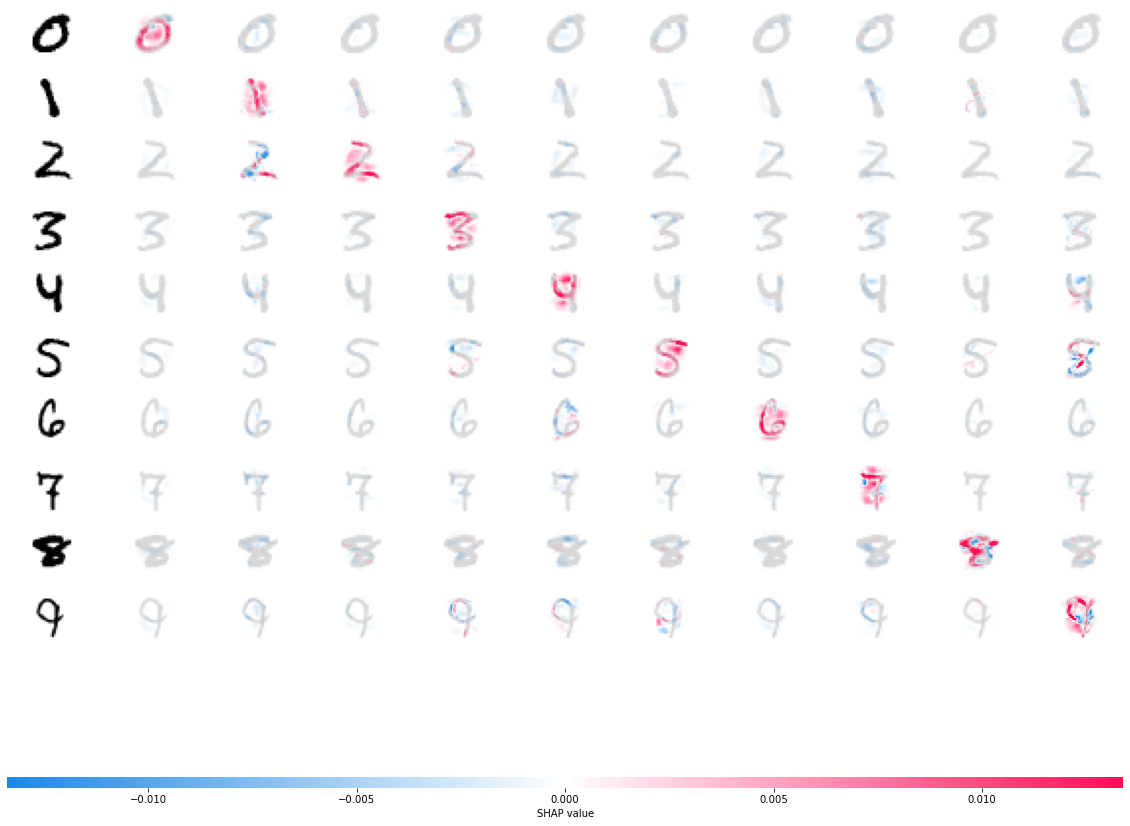

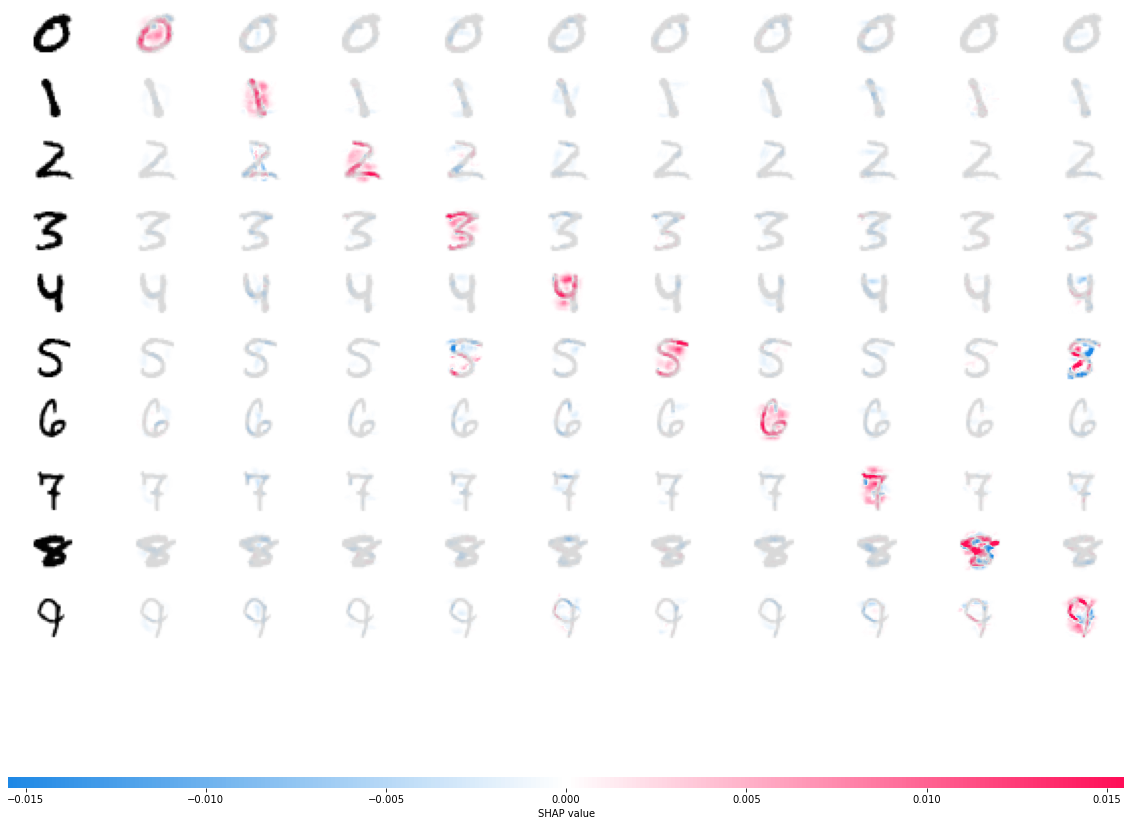

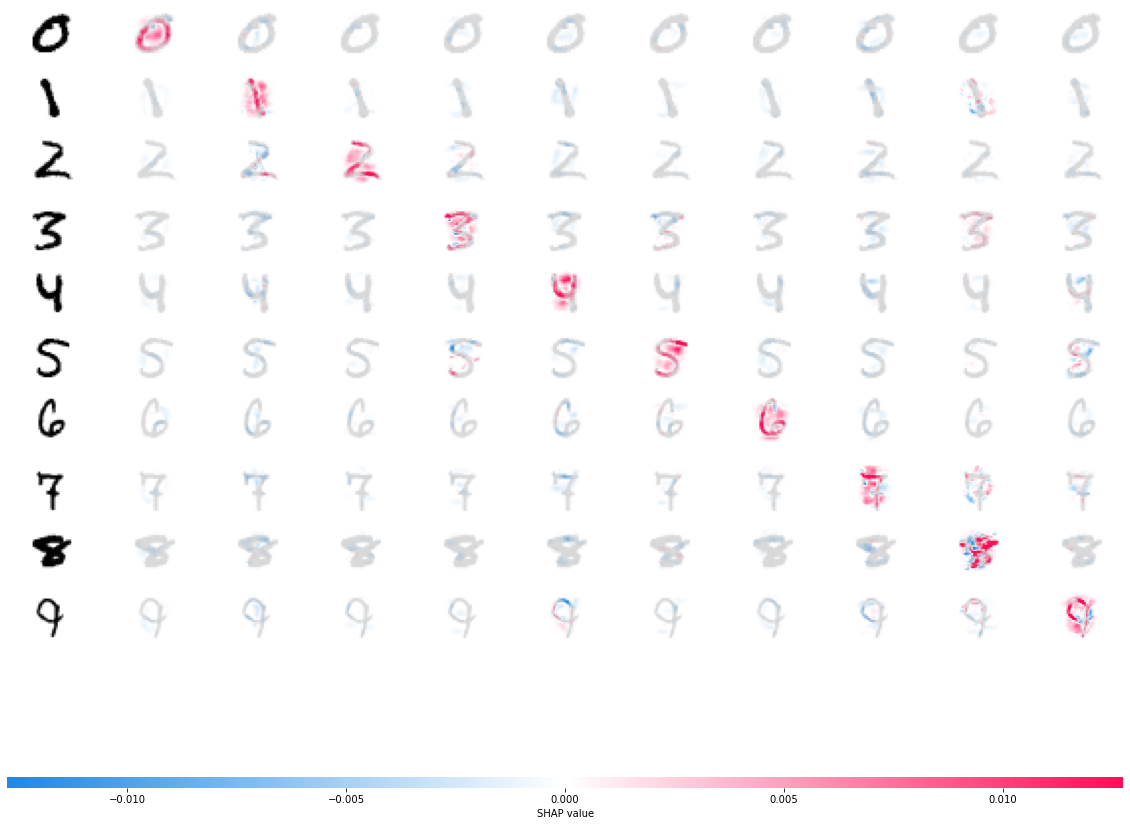

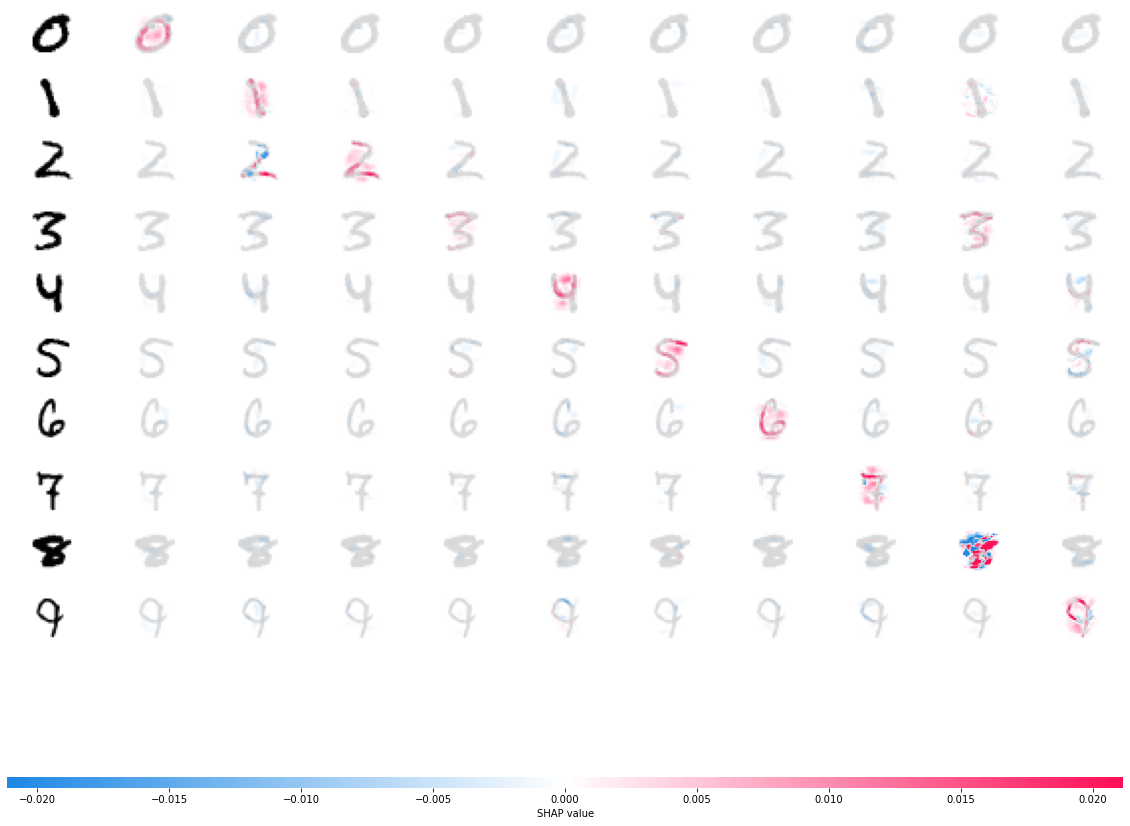

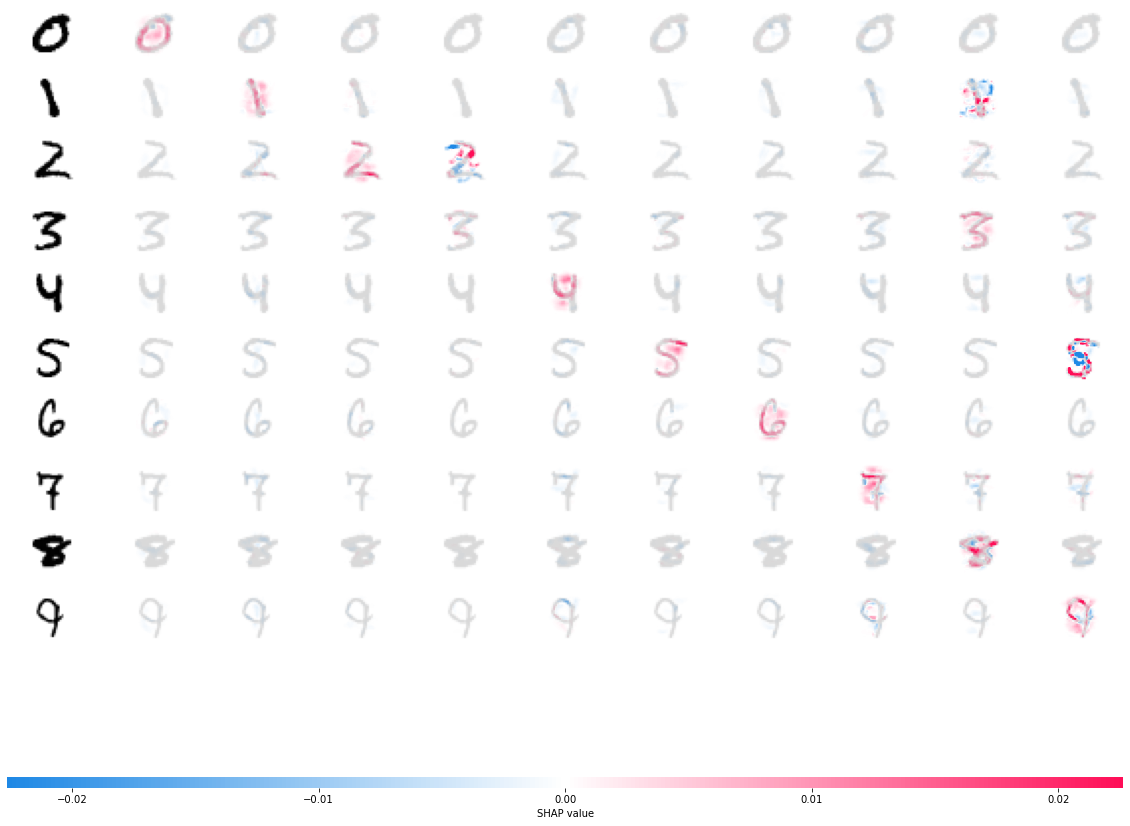

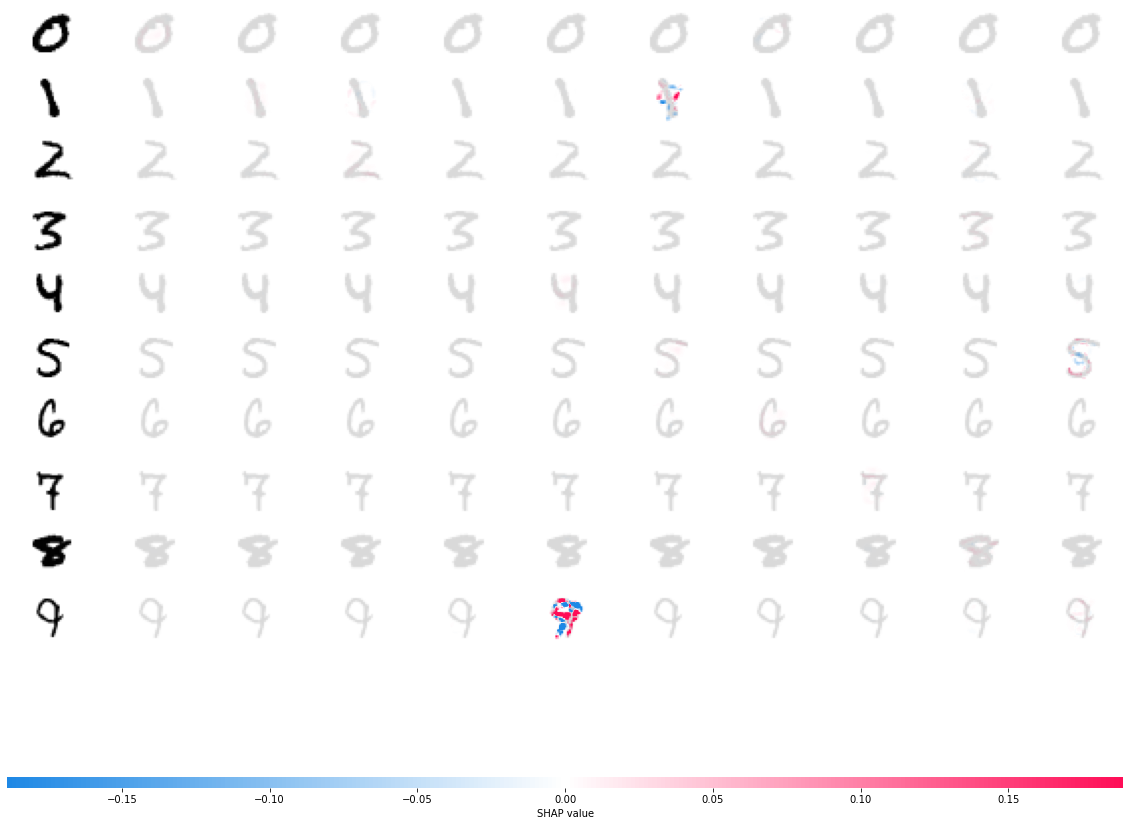

In [13]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = './results/ex3/MNIST/3_8/4_run_shap_values_{}_poisoned_clients_alpha_3_8.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [15]:
# Run 0
print(accuracies)
print(recalls)

[0.9757, 0.9773, 0.9735, 0.9498, 0.882, 0.8779]
[tensor([0.9929, 0.9930, 0.9787, 0.9812, 0.9745, 0.9798, 0.9833, 0.9601, 0.9456,
        0.9663]), tensor([0.9949, 0.9938, 0.9787, 0.9743, 0.9766, 0.9798, 0.9770, 0.9679, 0.9641,
        0.9643]), tensor([0.9929, 0.9938, 0.9797, 0.9228, 0.9796, 0.9798, 0.9833, 0.9679, 0.9671,
        0.9673]), tensor([0.9918, 0.9894, 0.9738, 0.7050, 0.9644, 0.9888, 0.9843, 0.9660, 0.9774,
        0.9604]), tensor([0.9918, 0.9930, 0.9758, 0.0228, 0.9776, 0.9809, 0.9770, 0.9708, 0.9733,
        0.9653]), tensor([0.9918, 0.9912, 0.9738, 0.0000, 0.9827, 0.9731, 0.9812, 0.9630, 0.9713,
        0.9594])]


## FashionMNIST
For Fashion-MNIST we experiment with 
(1) 5: sandal → 4: coat,
(2) 1: trouser → 3: dress, and 
(3) 8: Bag → 9: Ankle Boot.
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',  'Bag', 'Ankle Boot']


In [5]:
from federated_learning.nets import FMNISTCNN
from federated_learning.dataset import FMNISTDataset
import os
config = Configuration()
config.POISONED_CLIENTS = 0
config.DATA_POISONING_PERCENTAGE = 1
config.DATASET = FMNISTDataset
config.MODELNAME = config.FMNIST_NAME
config.NETWORK = FMNISTCNN
observer_config = ObserverConfiguration()
observer_config.experiment_type = "shap_fl_poisoned"
observer_config.experiment_id = 1
observer_config.test = False
observer_config.datasetObserverConfiguration = "MNIST"
neutral_label = 2

In [6]:
# Google Colab Settigns
config.TEMP = os.path.join('/content/drive/My Drive/Colab Notebooks/temp')
config.FMNIST_DATASET_PATH = os.path.join('/content/data/fmnist')
config.MNIST_DATASET_PATH = os.path.join('/content/data/mnist')
config.CIFAR10_DATASET_PATH = os.path.join('/content/data/cifar10')
config.VM_URL = "none"

In [7]:
data = config.DATASET(config)
shap_util = SHAPUtil(data.test_dataloader) 
server = Server(config, observer_config,data.train_dataloader, data.test_dataloader, shap_util)
client_plane = ClientPlane(config, observer_config, data, shap_util)
visualizer = Visualizer(shap_util)

FashionMnist training data loaded.
FashionMnist training data loaded.
Create 200 clients with dataset of size 300


In [ ]:
import numpy as np
import copy
for i in range(199):
    experiment_util.set_rounds(client_plane, server, i+1)
    experiment_util.run_round(client_plane, server, i+1)
print("Run 199 finished")
old_params = copy.deepcopy(server.get_nn_parameters())

In [ ]:
import torch
torch.save(server.net.state_dict(), "/content/drive/My Drive/Colab Notebooks/temp/models/FMNISTtrained.model")

### alpha (5,4)

In [8]:
from federated_learning.nets import FMNISTCNN
import torch
import copy
config.FROM_LABEL = 5
config.TO_LABEL = 4

server.net =  FMNISTCNN()
server.net.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/temp/models/FMNISTtrained.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [27]:
accuracies = []
recalls = []

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = '/content/drive/My Drive/Colab Notebooks/results/ex3/FMNIST/5_4/3_run_shap_values_{}_poisoned_clients_alpha_5_4.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [ ]:

print(accuracies)
print(recalls)

## alpha(1,3)

In [47]:
from federated_learning.nets import FMNISTCNN
import torch
import copy
config.FROM_LABEL = 1
config.TO_LABEL = 3

server.net =  FMNISTCNN()
server.net.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/temp/models/FMNISTtrained.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [48]:
accuracies = []
recalls = []

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = '/content/drive/My Drive/Colab Notebooks/results/ex3/FMNIST/1_3/3_run_shap_values_{}_poisoned_clients_alpha_1_3.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [ ]:
print(accuracies)
print(recalls)

alpha(8,9)

In [55]:
from federated_learning.nets import FMNISTCNN
import torch
import copy
config.FROM_LABEL = 8
config.TO_LABEL = 9

server.net =  FMNISTCNN()
server.net.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/temp/models/FMNISTtrained.model'))
old_params = copy.deepcopy(server.get_nn_parameters())

In [68]:
accuracies = []
recalls = []

In [ ]:
for j in range(config.CLIENTS_PER_ROUND + 1):
    client_plane.reset_default_client_nets()
    client_plane.reset_poisoning_attack()
    server.update_nn_parameters(old_params)
    server.test()
    recall, precision, accuracy = server.analize_test()
    print("Original", recall, precision, accuracy)
    file_name = '/content/drive/My Drive/Colab Notebooks/results/ex3/FMNIST/8_9/4_run_shap_values_{}_poisoned_clients_alpha_8_9.pdf'.format(j)
    config.POISONED_CLIENTS = j
    experiment_util.update_configs(client_plane, server, config, observer_config)
    client_plane.poison_clients()
    clean_clients = experiment_util.select_random_clean(client_plane, config, config.CLIENTS_PER_ROUND - j)
    poisoned_clients = experiment_util.select_poisoned(client_plane, j)
    clients = [*clean_clients, *poisoned_clients]
    print(clients)
    experiment_util.run_round_with(clients, old_params, client_plane, server, 200)
    server.test()
    server_shap = server.get_shap_values()
    recall, precision, accuracy = server.analize_test()
    accuracies.append(accuracy)
    recalls.append(recall)
    visualizer.plot_shap_values(server_shap,file_name)
    print(recall, precision, accuracy)
    print("Poisoned clients: {}".format(j))

In [ ]:
print(accuracies)
print(recalls)